## TODO's
- Record an audio file of the following sentence "Hello, my name is <your_name_here>"
- Open the file using pydub
- Apply a low-pass `Butterworth` digital filter (the order of the filter doesn't matter). Choose different `Wn` also known as cuttoff frequency and plot the signal `filtered` and `unfiltered`. Use `filtfilt`.
- Do the same with a high-pass filter (read the docs 😼)
- Explain the visual differences of the high-pass and low-pass filter on the filtered signal.
- Choose `butter` filter parameters to save an `mp3` audio file of your recording that resembles to be recorded from a phone call
## How to deliver the project
- Deliver your code in following folder as a PR: `module2/lab-pydub-filter`
## Links & Resources
- https://github.com/jiaaro/pydub
- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html


In [21]:
from pydub import AudioSegment
from scipy import signal
import matplotlib.pyplot as plt
import array

In [22]:
audioname = "audio.wav"
audio = AudioSegment.from_file("./input/"+audioname)

In [26]:
def filt(fc,btype,samples):
    b, a = signal.butter(2, fc, btype=btype)
    #Apply the filter
    filtered = signal.filtfilt(b,a, samples)
    filtered_array = array.array(audio.array_type, filtered.astype(int))
    audiofilt = audio._spawn(filtered_array)
    export = audiofilt.export("./output/"+btype+"_"+audioname, format="wav")
    plt.figure(figsize = (10,10))
    plt.plot(filtered)

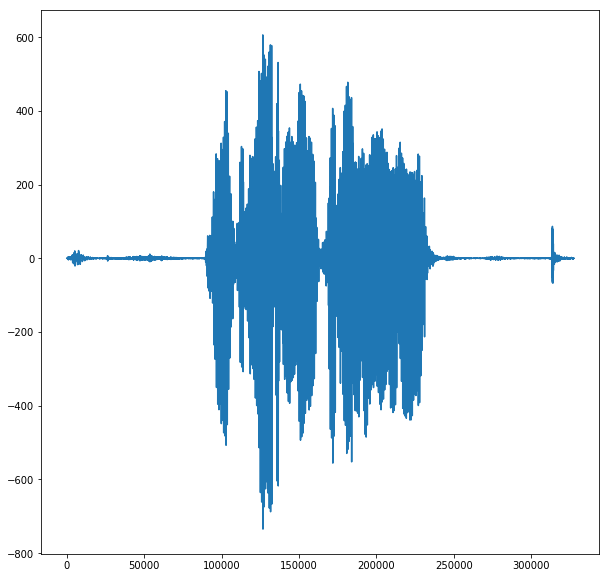

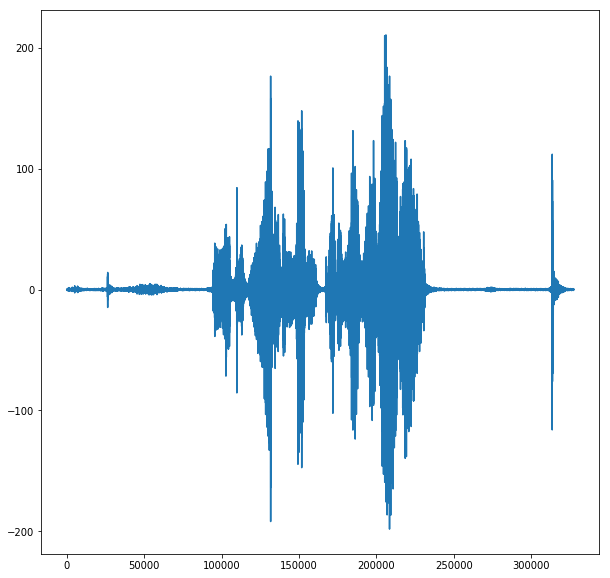

In [27]:
samples = audio.get_array_of_samples()

fs = len(samples)/2
cf = 8000
fc = cf / fs # Cutoff frequency normal

low = filt(fc,"low",samples)
high = filt(fc,"high",samples)
